In [2]:
import matplotlib.pyplot as plt
import numpy as np
from struct import unpack
import os
import yt
plt.rcParams.update({'font.size':14})

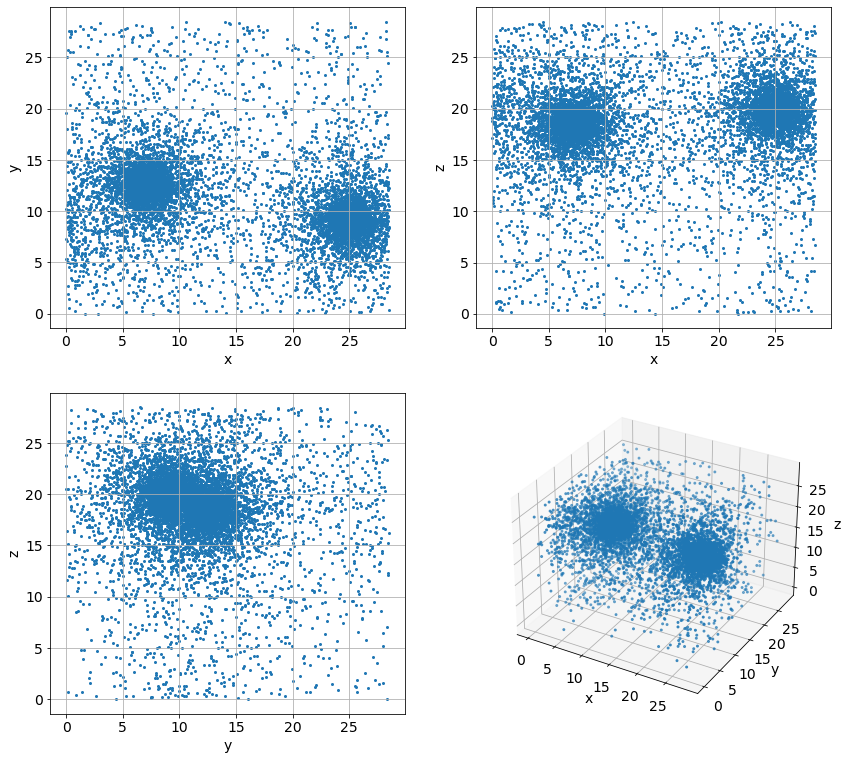

In [3]:
SIZEOFLONG=8
SIZEOFINT=4
SIZEOFFLOAT=4
with open('runtest/rand_init.nyx','rb') as file:
    nparticles = unpack('l', file.read(SIZEOFLONG))[0]
    numdim = unpack('i', file.read(SIZEOFINT))[0]
    nx = unpack('i', file.read(SIZEOFINT))[0]
    line = file.read(SIZEOFFLOAT*(3+nx))
    pdict = {'x' : [], 'y': [], 'z':[], 'mass': [], 'vx': [], 'vy': [], 'vz': []}
    while(line):
        x,y,z,mass,vx,vy,vz = unpack('f'*(3+nx),line)
        pdict['x'].append(x)
        pdict['y'].append(y)
        pdict['z'].append(z)
        line = file.read(SIZEOFFLOAT*(3+nx))
        #pdict['mass'].append(mass)
        #pdict['vx'].append(vx)
        #pdict['vy'].append(vy)
        #pdict['vz'].append(vz)
        
fig= plt.figure(figsize=(14,13))
ax1 = fig.add_subplot(221)
ax1.scatter(pdict['x'], pdict['y'], s=4)
ax1.grid()
ax1.set(xlabel='x', ylabel='y')
ax2 = fig.add_subplot(222)
ax2.scatter(pdict['x'], pdict['z'], s=4)
ax2.grid()
ax2.set(xlabel='x', ylabel='z')
ax3 = fig.add_subplot(223)
ax3.scatter(pdict['y'], pdict['z'], s=4)
ax3.grid()
ax3.set(xlabel='y', ylabel='z')
ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(pdict['x'], pdict['y'], pdict['z'], s=4)
ax4.grid()
ax4.set(xlabel='x', ylabel='y', zlabel='z')
plt.show()

In [19]:
def plot_rank_loads(filename='Nyx/Exec/LoadBalancingTests/rank_loads', idx=0):
    SIZEOFLONG = 8
    SIZEOFINT = 4
    SIZEOFFLOAT = 4
    with open(filename, 'rb') as file:
        numpts = unpack('l', file.read(SIZEOFLONG))[0]
        loads = []
        line = file.read(SIZEOFLONG)
        npts = 0
        while(line):
            numranks = unpack('l', line)[0]
            data = file.read(SIZEOFLONG*numranks)
            if len(data) == SIZEOFLONG*numranks:
                loads.append(unpack('l'*numranks, data))
            else:
                print("not enough data for specified number of ranks in line")
                print("numranks:",numranks)
                print("len(data):",len(data))
                break
            line = file.read(SIZEOFLONG)
            npts+=1

    loads = np.array(loads)
    nT,nR = loads.shape
    fig, ax = plt.subplots(2,1, figsize=(14,14))
    ax[0].plot(np.arange(idx+1,nT+1), loads[idx:,:],'-')
    ax[1].plot(np.arange(1,nR+1), loads[idx:,:].T, '-')
    #ax[1].plot(np.mean(loads, axis=0), '.-')
    lm = np.mean(loads,axis=1)
    ax[0].plot(lm,'g*')
    ax[0].plot(lm*1.2, 'r*')
    ax[0].plot(lm*0.8, 'b*')
    ax[0].set(xlabel='time-step', ylabel='num particles', title='nparticles for each rank over time')
    ax[1].set(xlabel='rank', ylabel='num particles', title='nparticles at each time step for each rank')
    ax[0].grid()
    ax[1].grid()
    
    return loads,fig

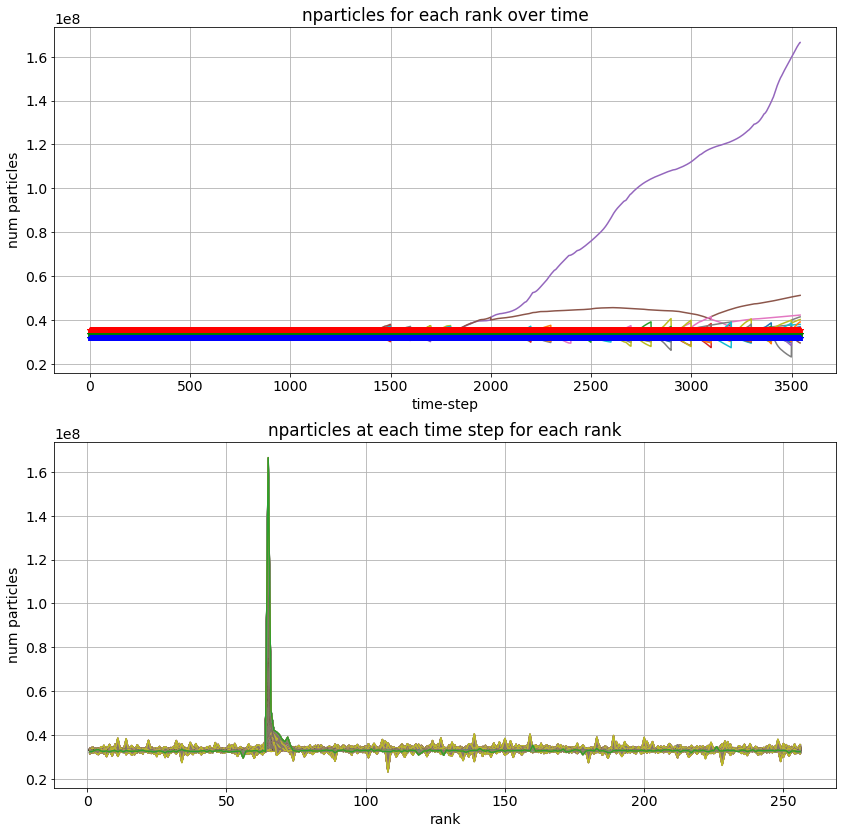

In [77]:
loads, fig = plot_rank_loads('rank_loads2048')
#fig.savefig('rank_loads2048.png',bbox_inches='tight')

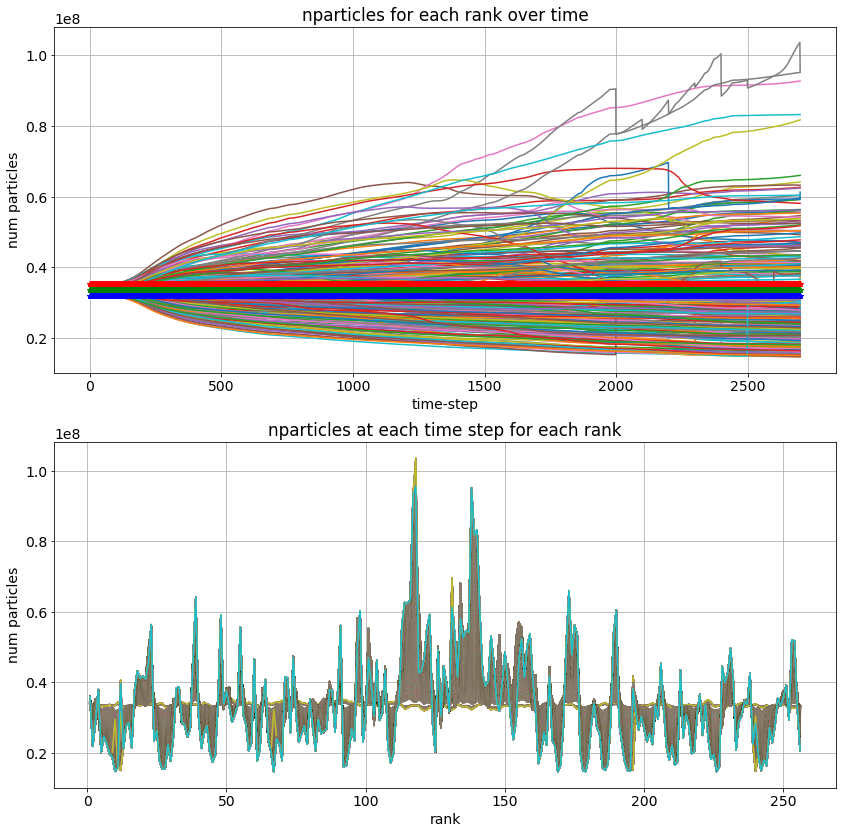

In [78]:
loads,fig = plot_rank_loads(filename='rank_loads_dual_grid2048')
#fig.savefig('rank_loads_dual_grid2048.png',bbox_inches='tight')

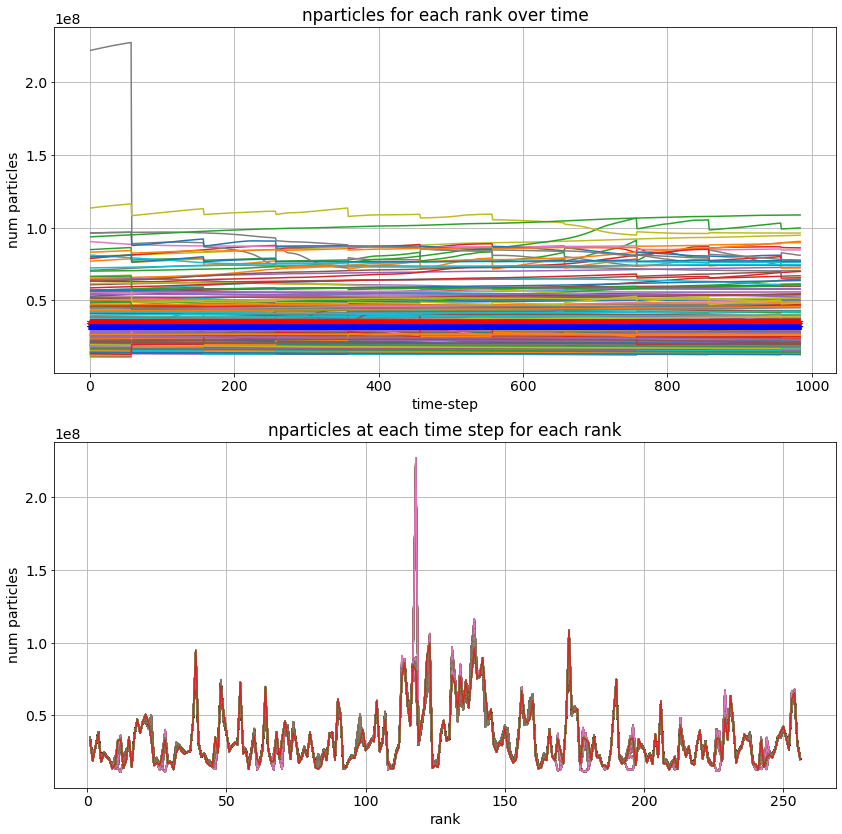

In [79]:
loads,fig = plot_rank_loads(filename='rank_loads_dual_grid2048Short3D')
#loads, fig = plot_rank_loads(filename='Nyx/Exec/LyA/rank_loads_dual_grid')
#fig.savefig('rank_loads_dual_grid2048_z=2.8-2.6.png', bbox_inches='tight')

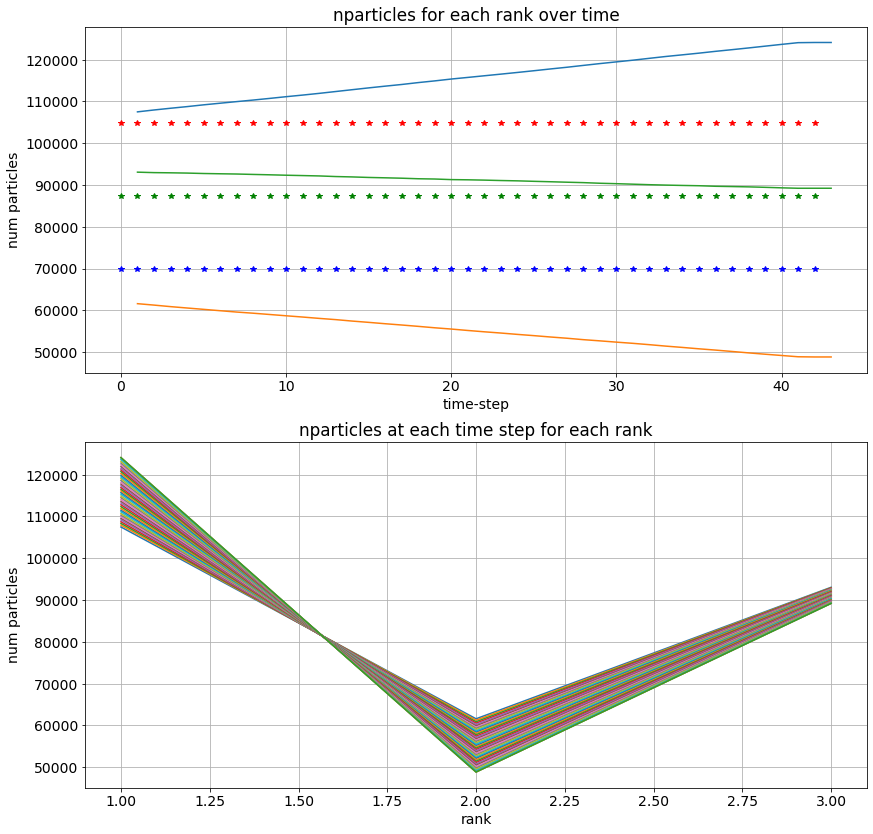

In [22]:
_,_ = plot_rank_loads(filename="runtest/rank_loads_dual_grid")

In [14]:
ds = yt.load("runtest/plt00404/", hint='Nyx')
ds.field_list  

yt : [INFO     ] 2023-07-06 10:06:26,305 Parameters: current_time              = 0.00342185598081136
yt : [INFO     ] 2023-07-06 10:06:26,306 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2023-07-06 10:06:26,307 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-07-06 10:06:26,308 Parameters: domain_right_edge         = [28.49002849 28.49002849 28.49002849]


[('DM', 'particle_cpu'),
 ('DM', 'particle_id'),
 ('DM', 'particle_mass'),
 ('DM', 'particle_position_x'),
 ('DM', 'particle_position_y'),
 ('DM', 'particle_position_z'),
 ('DM', 'particle_xvel'),
 ('DM', 'particle_yvel'),
 ('DM', 'particle_zvel'),
 ('all', 'particle_cpu'),
 ('all', 'particle_id'),
 ('all', 'particle_mass'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_xvel'),
 ('all', 'particle_yvel'),
 ('all', 'particle_zvel'),
 ('boxlib', 'Temp'),
 ('boxlib', 'density'),
 ('boxlib', 'particle_count'),
 ('boxlib', 'particle_mass_density'),
 ('boxlib', 'phi_grav'),
 ('boxlib', 'rho_e'),
 ('boxlib', 'xmom'),
 ('boxlib', 'ymom'),
 ('boxlib', 'zmom'),
 ('nbody', 'particle_cpu'),
 ('nbody', 'particle_id'),
 ('nbody', 'particle_mass'),
 ('nbody', 'particle_position_x'),
 ('nbody', 'particle_position_y'),
 ('nbody', 'particle_position_z'),
 ('nbody', 'particle_xvel'),
 ('nbody', 'particle_yvel'),
 ('nbody', 'particle_z

yt : [INFO     ] 2023-07-06 10:06:37,648 xlim = 0.000000 28.490028
yt : [INFO     ] 2023-07-06 10:06:37,650 ylim = 0.000000 28.490028
yt : [INFO     ] 2023-07-06 10:06:37,664 xlim = 0.000000 28.490028
yt : [INFO     ] 2023-07-06 10:06:37,665 ylim = 0.000000 28.490028
yt : [INFO     ] 2023-07-06 10:06:37,671 Making a fixed resolution buffer of (('boxlib', 'particle_mass_density')) 800 by 800



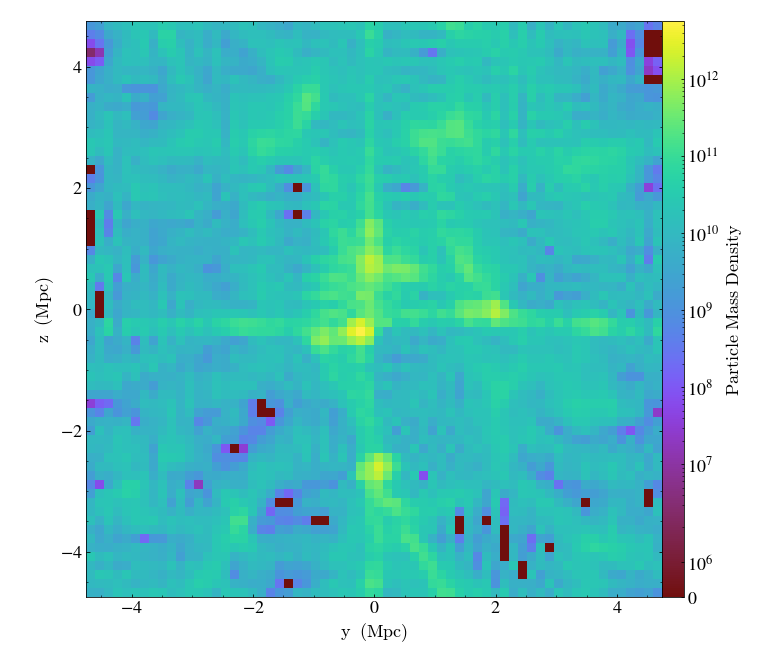

In [16]:
slc = yt.SlicePlot(ds, "x", "particle_mass_density")
slc.show()